In [46]:
#Завдання 1: Завантажити дані, вивести назви колонок і розмір датасета
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')  # Suppress all warnings
df = pd.read_csv("D:\\AD labs\\lala\\Machine_learning_labs\\new_model.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


In [29]:
#Завдання 2: Опрацювати пропуски (по можливості заповнити їх або видалити)
print(df.isnull().sum())
print("total null values in dataset: ", (df.isnull().sum().sum()))
print("\n")
print("\n")
print("----------------Statistical Analysis----------------")
print(df.describe())
print("\n")
print("----------------Duplicates count----------------")
duplicates = df.duplicated()
print("Кількість Дублікатів в датасеті:", duplicates.sum())
print("\n")
print(df[duplicates])

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64
total null values in dataset:  0




----------------Statistical Analysis----------------
               Bp          Sg          Al          Su         Rbc         Bu  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    76.455000    1.017712    1.015000    0.395000    0.882500   57.40550   
std     13.476536    0.005434    1.272329    1.040038    0.322418   49.28597   
min     50.000000    1.005000    0.000000    0.000000    0.000000    1.50000   
25%     70.000000    1.015000    0.000000    0.000000    1.000000   27.00000   
50%     78.000000    1.020000    1.000000    0.000000    1.000000   44.00000   
75%     80.000000    1.020000    2.000000    0.000000    1.000000   61.75000   
max    180.000000    1.025000    5.000000    5.000000    1.000000  391.00000   

              Sc      

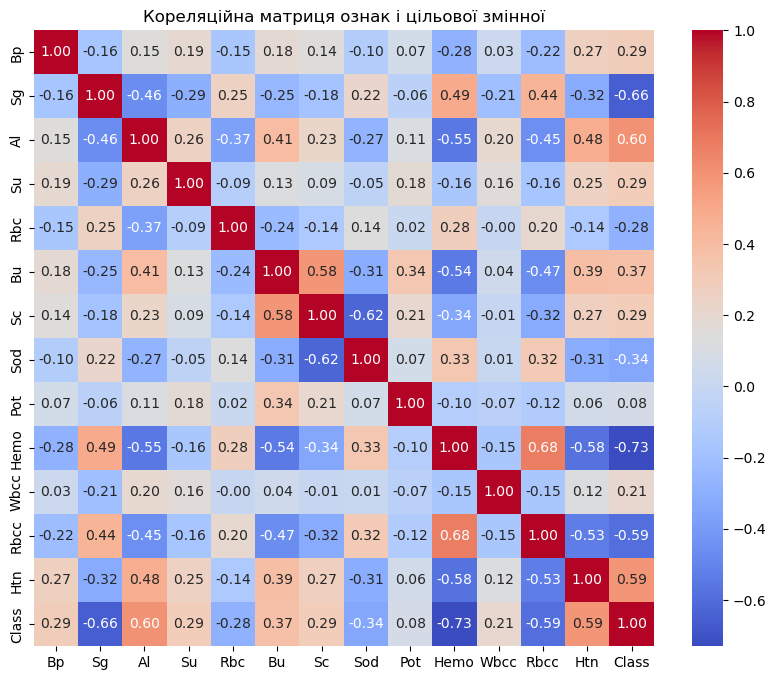

In [30]:
#3авдання 3 Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)
#3.1 heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця ознак і цільової змінної')
plt.show()


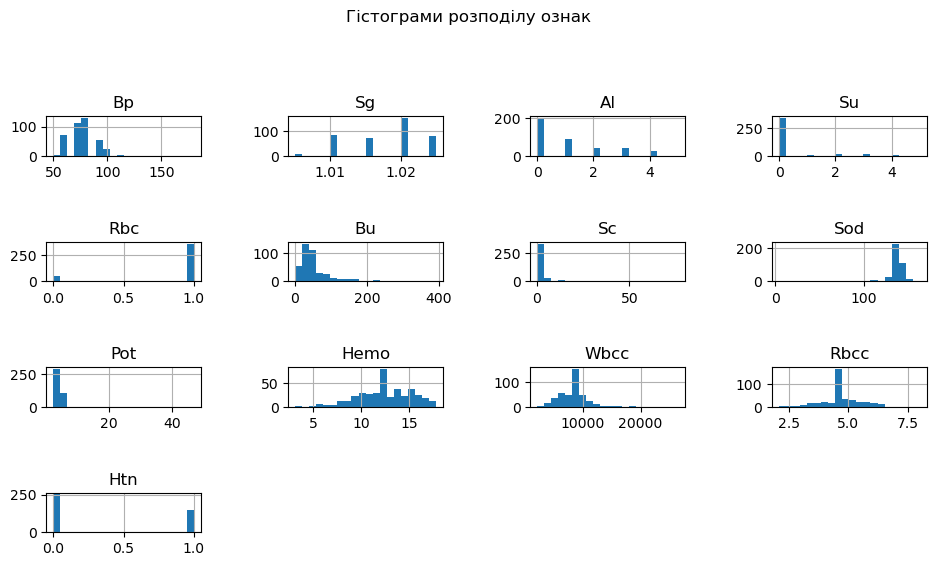

In [6]:
features = ['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc', 'Htn']

df[features].hist(figsize=(10, 6), bins=20)
plt.suptitle('Гістограми розподілу ознак')
plt.tight_layout(pad=3)
plt.show()

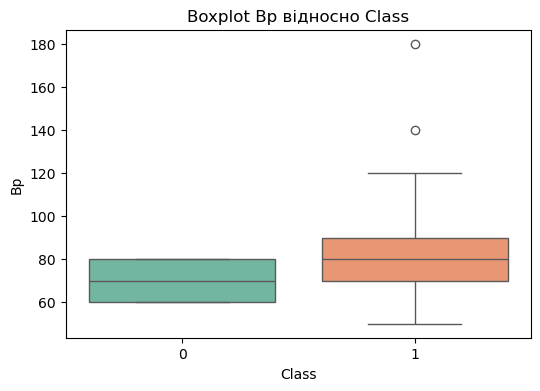

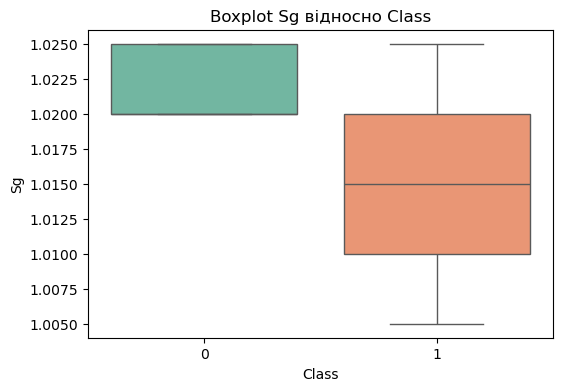

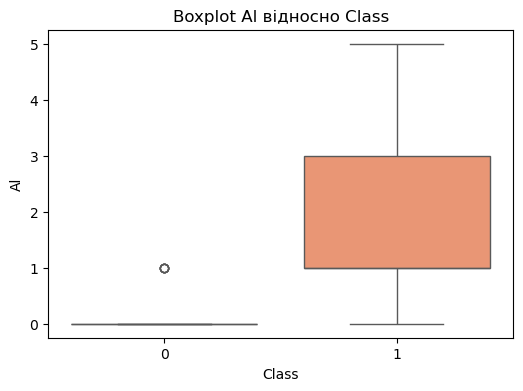

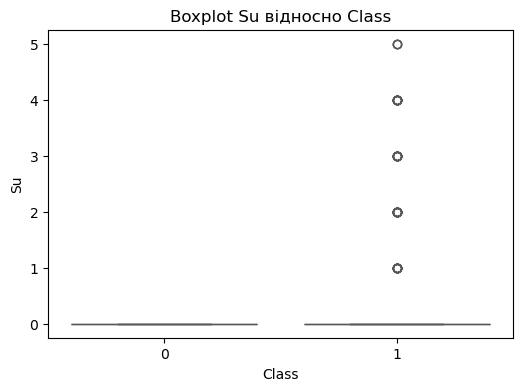

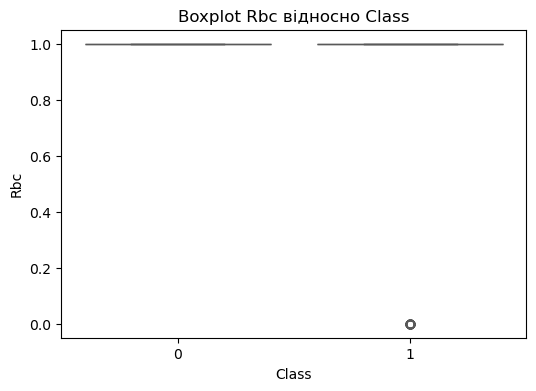

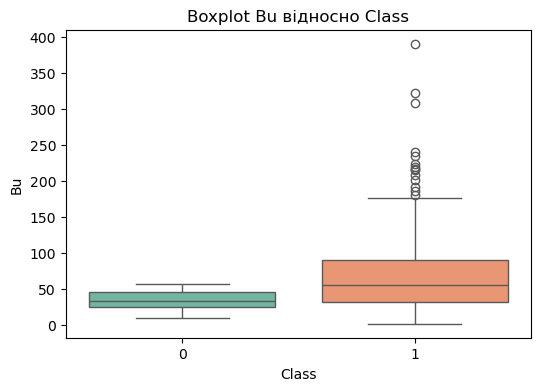

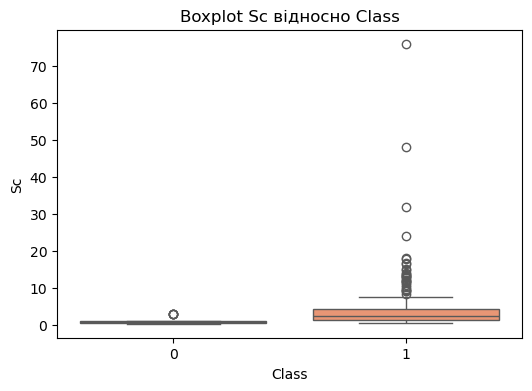

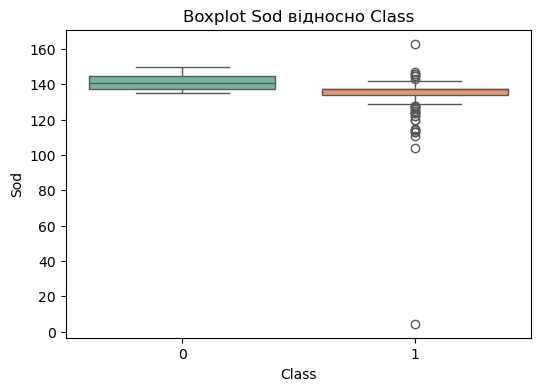

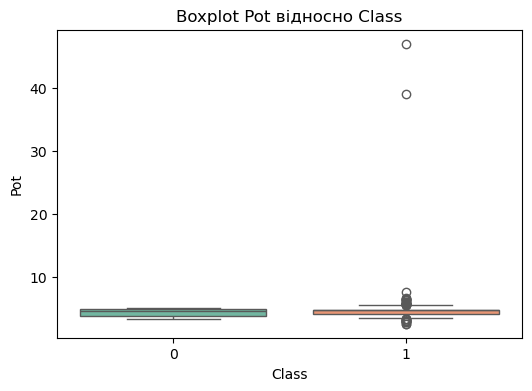

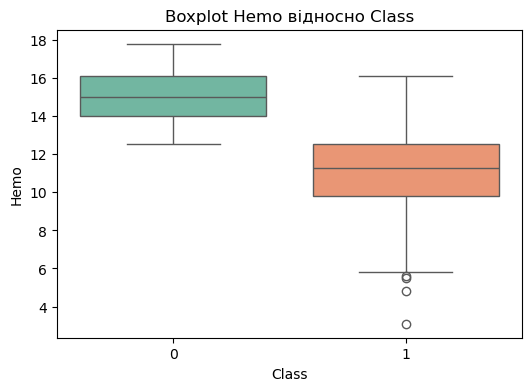

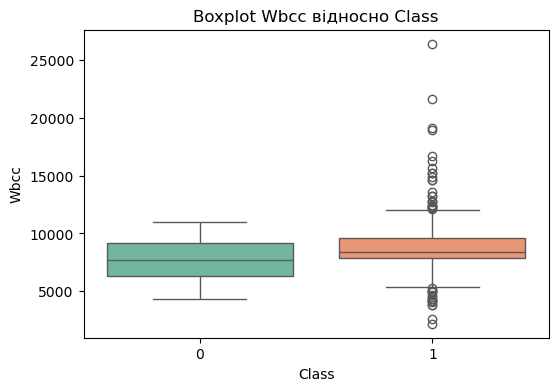

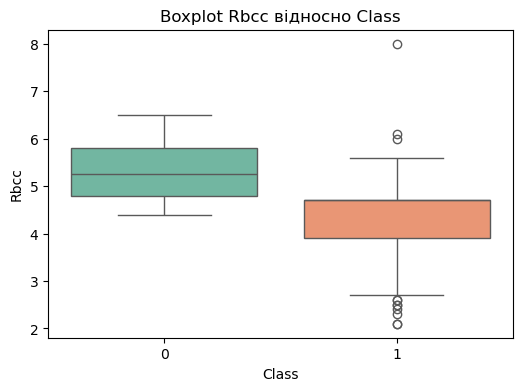

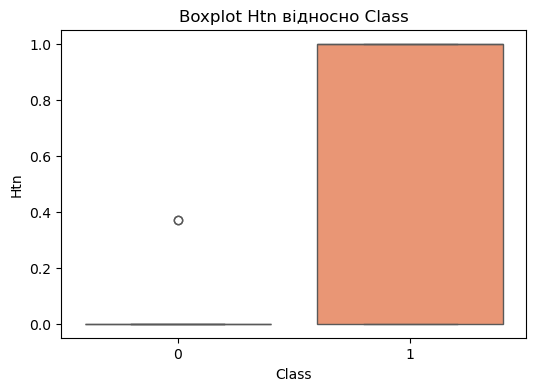

In [49]:
target = 'Class' 

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot {feature} відносно {target}')
    plt.show()

In [32]:
#Завдання 4 Нормалізація
X = df.drop(columns=['Class'])
y = df['Class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled = pd.concat([X_scaled, y], axis=1)
print(df_scaled.describe())

               Bp          Sg          Al          Su         Rbc          Bu  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.203500    0.635625    0.203000    0.079000    0.882500    0.143531   
std      0.103666    0.271701    0.254466    0.208008    0.322418    0.126537   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.153846    0.500000    0.000000    0.000000    1.000000    0.065469   
50%      0.215385    0.750000    0.200000    0.000000    1.000000    0.109114   
75%      0.230769    0.750000    0.400000    0.000000    1.000000    0.154685   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               Sc         Sod         Pot        Hemo        Wbcc        Rbcc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.035349    0.839300    0.047817    0.641286    0.256450    0.442081   
std      0.074305    0.0580

In [33]:
# Завдання 5 Провести навчання наступних класифікаторів: KNN, Random Forest, Decision Tree, Adaboost, SVM
# 5.1 Зробимо підбір параметрів для усіх моделей
def grid_search(X, y, model_name="Logistic Regression", n_iter=20):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    models = {
        "KNN": {
            "model": KNeighborsClassifier(),
            "params": {
                'model__n_neighbors': [3, 5, 7, 10],
                'model__weights': ['uniform', 'distance'],
                'model__metric': ['euclidean', 'manhattan']
            }
        },
        "Decision Tree": {
            "model": DecisionTreeClassifier(random_state=13),
            "params": {
                'model__max_depth': [7, 10, None],
                'model__min_samples_split': [2, 5, 10],
                'model__criterion': ['gini', 'entropy']
            }
        },
        "SVM": {
            "model": SVC(random_state=13),
            "params": {
                'model__C': [0.1, 1, 10],
                'model__kernel': ['poly', 'rbf', 'sigmoid'],
                'model__gamma': ['scale', 'auto'],
                'model__decision_function_shape': ['ovo', 'ovr']
            }
        },
       "AdaBoost": {
                 "model": AdaBoostClassifier(random_state=13),
                 "params": {
                     'model__n_estimators': [50, 100, 150, 200],
                     'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
                     'model__algorithm': ['SAMME', 'SAMME.R']  # SAMME.R — швидший, підходить для більшості задач
                }
        },
        "RandomForest": {
            "model": RandomForestClassifier(random_state=13),
            "params": {
                'model__n_estimators': [100, 200],
                'model__max_depth': [None, 10, 20],
                'model__min_samples_split': [2, 5],
                'model__min_samples_leaf': [1, 2],
                'model__max_features': ['sqrt', 'log2']

            }
        }
    }

    if model_name not in models:
        raise ValueError(f"Model '{model_name}' not found. Available: {list(models.keys())}")

    config = models[model_name]

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])

    grid = GridSearchCV(pipe, config['params'], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Tested model:", model_name)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy on test: {acc:.4f}")

    return best_model


In [34]:
grid_search(X_scaled, y, model_name = 'KNN')

Tested model: KNN
Best parameters: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'distance'}
Accuracy on test: 0.9917


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7,
                                      weights='distance'))])

In [35]:
grid_search(X_scaled, y, model_name = 'SVM')

Tested model: SVM
Best parameters: {'model__C': 1, 'model__decision_function_shape': 'ovo', 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}
Accuracy on test: 0.9917


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVC(C=1, decision_function_shape='ovo', kernel='sigmoid',
                     random_state=13))])

In [36]:
grid_search(X_scaled, y, model_name = 'RandomForest')

Tested model: RandomForest
Best parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Accuracy on test: 0.9917


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=13))])

In [47]:
grid_search(X_scaled, y, model_name = 'AdaBoost')

Tested model: AdaBoost
Best parameters: {'model__algorithm': 'SAMME', 'model__learning_rate': 0.1, 'model__n_estimators': 150}
Accuracy on test: 0.9917


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1,
                                    n_estimators=150, random_state=13))])

In [38]:
grid_search(X_scaled, y, model_name = 'Decision Tree')

Tested model: Decision Tree
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_split': 2}
Accuracy on test: 0.9750


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=7, random_state=13))])

In [43]:
#5.2 Класифікація, виведення метрик
def classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    tree = DecisionTreeClassifier(random_state=24, min_samples_split=2, criterion='gini', max_depth =7)
    clf = RandomForestClassifier(max_depth=None, random_state=0, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
    knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
    svm = SVC(C=1, kernel='sigmoid', gamma='scale')
    ada = AdaBoostClassifier(algorithm = 'SAMME', n_estimators=150, learning_rate=0.1, random_state=0)

    tree.fit(X_train_std, y_train)
    clf.fit(X_train_std, y_train)
    knn.fit(X_train_std, y_train)
    svm.fit(X_train_std, y_train)
    ada.fit(X_train_std, y_train)
   
    y_pred_tree = tree.predict(X_test_std)
    y_pred_clf = clf.predict(X_test_std)
    y_pred_knn = knn.predict(X_test_std)
    y_pred_svm = svm.predict(X_test_std)
    y_pred_ada = ada.predict(X_test_std)

    cm_tree = confusion_matrix(y_test, y_pred_tree)
    cm_forest = confusion_matrix(y_test, y_pred_clf)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    cm_ada = confusion_matrix(y_test, y_pred_ada)
   
    print("матриця помилок для дерева рішень:\n", cm_tree)
    print("матриця помилок для рандом форест:\n", cm_forest)
    print("матриця помилок для кнн:\n", cm_knn)
    print("матриця помилок для свм:\n", cm_svm)
    print("матриця помилок для адабуст:\n", cm_ada)

     
    print("репорт класифікації decision_tree:\n", classification_report(y_test, y_pred_tree))
    print("репорт класифікації рандом форест:\n", classification_report(y_test, y_pred_clf))
    print("репорт класифікації knn:\n", classification_report(y_test, y_pred_knn))
    print("репорт класифікації svm ovo:\n", classification_report(y_test, y_pred_svm))
    print("репорт класифікації Adaboost:\n", classification_report(y_test, y_pred_ada))
   

    reports = {
        "Decision Tree": classification_report(y_test, y_pred_tree, output_dict=True),
        "Random Forest": classification_report(y_test, y_pred_clf, output_dict=True),
        "KNN": classification_report(y_test, y_pred_knn, output_dict=True),
        "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
        "Ada": classification_report(y_test, y_pred_ada, output_dict=True)
        
    }

In [48]:
classification(X_scaled, y)

матриця помилок для дерева рішень:
 [[37  2]
 [ 2 79]]
матриця помилок для рандом форест:
 [[38  1]
 [ 1 80]]
матриця помилок для кнн:
 [[39  0]
 [ 1 80]]
матриця помилок для свм:
 [[39  0]
 [ 2 79]]
матриця помилок для адабуст:
 [[39  0]
 [ 1 80]]
репорт класифікації decision_tree:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.98      0.98      0.98        81

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120

репорт класифікації рандом форест:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.99      0.99      0.99        81

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

репорт класифікації knn:
